In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf

In [3]:
# import data,data have been collected from different sources and  put in a single file 
data=pd.read_csv('S&P.csv',index_col=0,parse_dates=True,na_values=["",".","0","null"])
data.head(3)

,S&P,1YTBILL,3MTBILL,6MTBILL,OILB,OILT,FED,USD/EUR,GOLD,USD/CNY,USD/GBP
Date,,,,,,,,,,,
2009-01-02,931.799988,0.38,0.08,0.28,42.94,46.17,0.08,0.7176,869.75,6.80,0.6896
2009-01-05,927.450012,0.41,0.14,0.32,45.84,48.61,0.11,0.7334,860.00,6.82,0.6865
2009-01-06,934.700012,0.42,0.14,0.31,48.89,48.56,0.09,0.7476,844.00,6.83,0.6809


In [4]:
#first step check correlation between S&P500 and inputs and remove inputs with weak correlation
corr=data.corr()
corr

,S&P,1YTBILL,3MTBILL,6MTBILL,OILB,OILT,FED,USD/EUR,GOLD,USD/CNY,USD/GBP
S&P,1.000000,0.772188,0.786958,0.785081,-0.401122,-0.447292,0.801194,0.738190,-0.002773,0.178569,0.742263
1YTBILL,0.772188,1.000000,0.984906,0.994850,-0.410710,-0.451536,0.971776,0.513974,-0.130463,0.526192,0.778590
3MTBILL,0.786958,0.984906,1.000000,0.996555,-0.329345,-0.378659,0.994356,0.490485,-0.033128,0.502027,0.763354
6MTBILL,0.785081,0.994850,0.996555,1.000000,-0.370364,-0.417303,0.987697,0.507199,-0.073953,0.511921,0.775645
OILB,-0.401122,-0.410710,-0.329345,-0.370364,1.000000,0.973713,-0.341094,-0.711878,0.643472,-0.529334,-0.626219
OILT,-0.447292,-0.451536,-0.378659,-0.417303,0.973713,1.000000,-0.392289,-0.763903,0.519507,-0.504387,-0.665344
FED,0.801194,0.971776,0.994356,0.987697,-0.341094,-0.392289,1.000000,0.514469,-0.016524,0.511294,0.778719
USD/EUR,0.738190,0.513974,0.490485,0.507199,-0.711878,-0.763903,0.514469,1.000000,-0.158504,0.287996,0.780883
GOLD,-0.002773,-0.130463,-0.033128,-0.073953,0.643472,0.519507,-0.016524,-0.158504,1.000000,-0.322429,-0.121290
USD/CNY,0.178569,0.526192,0.502027,0.511921,-0.529334,-0.504387,0.511294,0.287996,-0.322429,1.000000,0.628097


In [5]:
# sort correlation
corr['S&P'].sort_values(ascending=False)

S&P        1.000000
FED        0.801194
3MTBILL    0.786958
6MTBILL    0.785081
1YTBILL    0.772188
USD/GBP    0.742263
USD/EUR    0.738190
USD/CNY    0.178569
GOLD      -0.002773
OILB      -0.401122
OILT      -0.447292
Name: S&P, dtype: float64

In [6]:
# removing inputs with weak correlation
data.drop(['GOLD','USD/CNY','OILB'],axis=1,inplace=True)
data

,S&P,1YTBILL,3MTBILL,6MTBILL,OILT,FED,USD/EUR,USD/GBP
Date,,,,,,,,
2009-01-02,931.799988,0.38,0.08,0.28,46.17,0.08,0.7176,0.6896
2009-01-05,927.450012,0.41,0.14,0.32,48.61,0.11,0.7334,0.6865
2009-01-06,934.700012,0.42,0.14,0.31,48.56,0.09,0.7476,0.6809
2009-01-07,906.650024,0.41,0.11,0.29,42.75,0.11,0.7327,0.6596
2009-01-08,909.729980,0.41,0.09,0.28,41.68,0.10,0.7289,0.6579
...,...,...,...,...,...,...,...,...
2019-12-23,3224.010010,1.49,1.56,1.56,60.51,1.55,0.9020,0.7736
2019-12-24,3223.379883,1.49,1.55,1.57,61.17,1.55,0.9030,0.7723
2019-12-26,3239.909912,1.49,1.55,1.57,61.72,1.55,NaN,NaN


In [7]:
# removing missing data 
data.dropna(inplace=True)

In [8]:
# categorize S&P500 into two category , 0 for downward trend and 1 for upward trend,using MACD indicator for categorizing 

mean_12=data['S&P'].rolling(window=12).mean()
mean_26=data['S&P'].rolling(window=26).mean()
mean_12=mean_12.iloc[27:]
mean_26=mean_26.iloc[27:]
data=data.iloc[27:,:]
data['target']=0
for i in range(len(mean_12)):
    if mean_12.iloc[i]<mean_26.iloc[i]:
        data['target'][i]=0
    else:
        data['target'][i]=1

C:\Users\sahar\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\sahar\anaconda3\envs\tensorflow_env\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\sahar\anaconda3\envs\tensorflow_env\lib\site-packages\IPython\core\interactiveshell.py:3331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pan

In [9]:
# removing S&P500 price,we don't need it anymore
data=data.iloc[:,1:]
data.head(3)

,1YTBILL,3MTBILL,6MTBILL,OILT,FED,USD/EUR,USD/GBP,target
Date,,,,,,,,
2009-02-11,0.59,0.30,0.45,35.93,0.22,0.7751,0.6968,0
2009-02-12,0.57,0.29,0.42,34.03,0.23,0.7828,0.7019,0
2009-02-13,0.60,0.29,0.45,37.63,0.22,0.7745,0.6928,0


In [10]:
# define the X and y , there are 7 inputs and 1 output
X=data.iloc[:,:7].values
y=data.iloc[:,7].values

In [11]:
# standardize the input 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

In [12]:
# prepare data for feeding to cnn , use time step to creat 3 dimensional matrix
time_steps=7
X_new= np.zeros((X.shape[0] - time_steps +1,7, X.shape[1]))
y_new= np.zeros((y.shape[0] -time_steps +1,))
for ix in range(X_new.shape[0]):
    for jx in range(time_steps):
        X_new[ix, jx, :]= X[ix +jx, :]
    y_new[ix]= y[ix+time_steps-1]
print(X_new.shape, y_new.shape)

(2648, 7, 7) (2648,)


In [13]:
# split data into 80% train and 20% test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.2,random_state=42)

In [14]:
tf.random.set_seed(42)

# Convolutional neural network

In [15]:
# based on the vanila neural network that I build I just add one layer convolutional and pooling layer to vanila neural network to see
# whether the accuracy will improve or not,use hyperparameter tuning for filter and kernel size
def cnn_model(filters=10,kernel_size=7):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv1D(filters=filters, kernel_size=kernel_size,activation='relu',padding='same',input_shape=(7, 7)))
    model.add(tf.keras.layers.AveragePooling1D(pool_size=2))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(35,activation='tanh'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
    optimizer = tf.keras.optimizers.Adam(lr=0.001)
    model.compile(loss='hinge',optimizer=optimizer,metrics=["accuracy"])
    return model
    
model = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=cnn_model,epochs=200,verbose=0)
from sklearn.model_selection import GridSearchCV
filters=[20,30,40,50]
kernel_size=[3,5,7]
param_grid = dict(filters=filters,kernel_size=kernel_size)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train,validation_data=[X_test,y_test])

In [16]:
grid_result.best_params_

{'filters': 20, 'kernel_size': 5}

In [17]:
grid_result.best_score_

0.718602458635966

In [18]:
#build model based on the best hyperparameter we get
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv1D(filters=grid_result.best_params_['filters'], kernel_size=grid_result.best_params_['kernel_size'],activation='relu',padding='same',input_shape=(7, 7)))
model.add(tf.keras.layers.AveragePooling1D(pool_size=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(35,activation='tanh'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
optimizer = tf.keras.optimizers.Adam(lr=0.001)
model.compile(loss='hinge',optimizer=optimizer,metrics=["accuracy"])

In [19]:
history=model.fit(X_train, y_train,validation_data=[X_test,y_test], epochs=500,verbose=0)

In [20]:
def plot_loss_acc():
    plt.figure(figsize=(16,8))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.xlabel('epochs',fontsize=18)
    plt.ylabel('val_loss',fontsize=18)
    plt.title('model_loss',fontsize=18)
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
    
    plt.figure(figsize=(16,8))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model Accuracy')
    plt.ylabel('val_acc')
    plt.xlabel('epoch')
    plt.legend(['train','test'], loc='upper left')
    plt.show() 

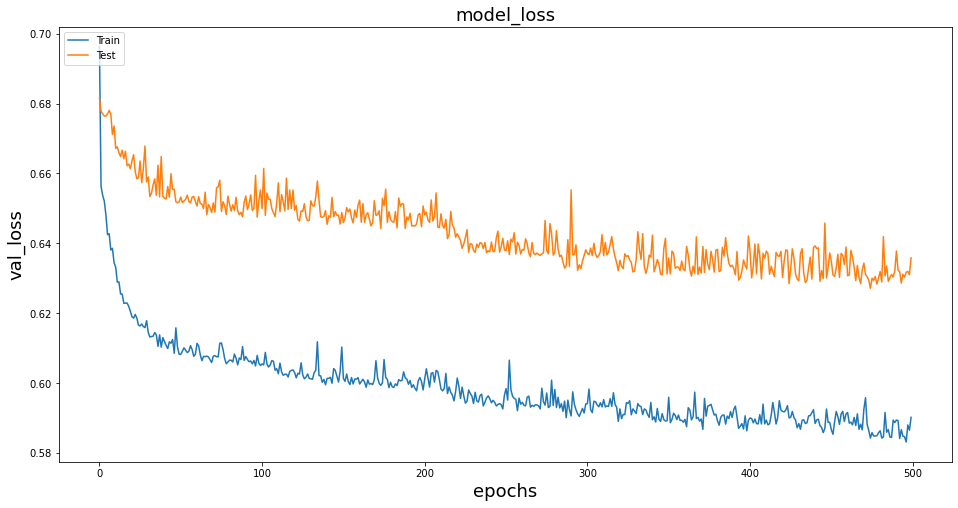

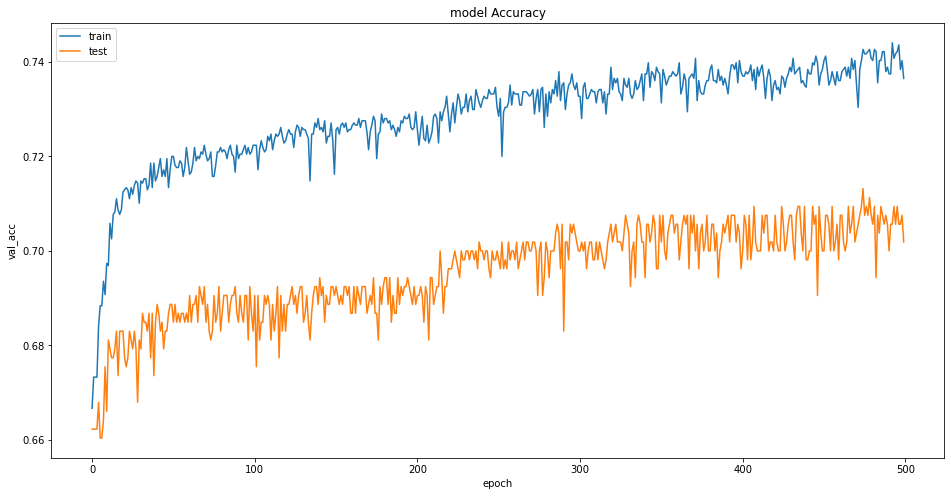

In [21]:
plot_loss_acc()

In [22]:
from sklearn.metrics import classification_report
y_pred=model.predict_classes(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.16      0.26       179
         1.0       0.69      0.98      0.81       351

    accuracy                           0.70       530
   macro avg       0.75      0.57      0.54       530
weighted avg       0.73      0.70      0.63       530

